In [1]:
# import libraries & Dataset
import pandas as pd

# import os
# os.getcwd()     # get current working directory

In [2]:
# dataset
movies = pd.read_csv("./MovieRatings.csv")

In [3]:
# check length of the dataset
len(movies)

559

In [4]:
# Explore the dataset
    # checking the datsset is a good habit 
    # however we can't fully explore if the dataset is too big and lots of columns
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [4]:
# RENAME the columns so that we can use '.' operator
    # notice "Rotten Tomatoes Ratings %" is actually a 'Critic Rating'
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:

# -=-=-=-  categorical data  -=-=-=-
# which data should we treat as category?
    # 'Year' is a numerical data, but we should treat it as 'category'. Why?
    # lets do more exploration to understand the reason - 

# Get some information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [5]:

# Notice we have 6 columns
    # 2 of those are 'objects' but not 'category' yet
    # 4 of those are int type

    # 'CriticRating', 'AudienceRating', 'BudgetMillions' are meaningful in int-type
        # these can have mean, variance, max, min and other statistical-data

    # But "Years" cannot be treated as 'int-type'. There is no mean, variance for "Years"
        # We don't really treat "Years" as numerical data. "Years" is a 'Ctegorical data'
        # We have to convert "Years" from NUMERICAL data to 'CTEGORICAL data'
        # Notice right now we have mean, variance, max, min, 25%(1st quartel), 50%(median), 75%(3rd quartel)  for "Year". Which is absurd.


# Statistical info
movies.describe()
# mean, variance, max, min, 25%(1st quartel), 50%(median), 75%(3rd quartel) make sense for 
    # 'CriticRating', 'AudienceRating', 'BudgetMillions'
    # those statistical info have no meaning foor "Year"
        # So we treat "Year" as categorical data
        # "Years" are presented as numbers, but there could be moonths (Jan, Feb, Mar)
        # after transformatioon to categorical variable we can still do some basic arithmatic operation like 'Dofference', 'max', 'min'


,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
# ----   convert 'numerical-type',' object-type' to "categorical-type"   ----
movies['Film'].astype("category")   # way 1: using [] to access column


0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: category
Categories (559, object): ['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours', ..., 'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper']

In [8]:
movies.Genre.astype("category")   # way 2: using '.' to access column

0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

In [5]:
# use assignment '=' operation to update the dataset
movies['Film'] = movies['Film'].astype("category")
movies.Genre = movies.Genre.astype("category")   # way 2: using '.' to access column
movies.Year = movies.Year.astype("category")   # way 2: using '.' to access column

In [10]:

# Explore the changes
movies.head() 
movies.info()   # notice the 'obect-type' are converted to 'category'
# in 'R-programming'  categories are called fdactors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [7]:
# Getting 'uniques' used in a 'category' columns
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [8]:
# How to get all 'Unique Categories'
movies.Genre.unique()  # shows all the 'categories' used in a column

['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

In [9]:
# Explore the 'statistical-info' again
    # notice 'Year' is no longer considered as 'numerical data', it act as 'category'
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [1]:
# ------------    jointplots    ------------
# Import the following packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# plot shown in Jupyter Notebook
%matplotlib inline  
# expand the figure-width
plt.rcParams['figure.figsize'] = 8, 4


# --------    Loading Dataset    --------
# Import the csv dataset
movies = pd.read_csv("./MovieRatings.csv")     # load datset

# -=-=-  Explore the data  -=-=-
# Visualize the dataframe
movies

# rename the column names to single-string names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()    # view dataset

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


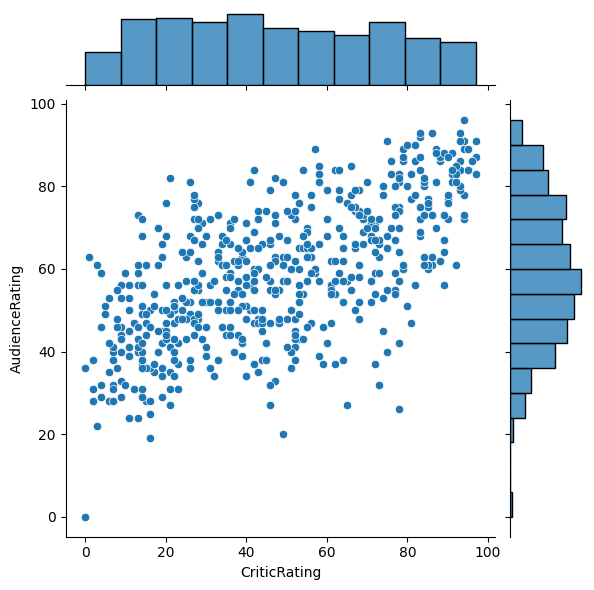

In [2]:
# -=-=-=-  Jointplots  -=-=-=-
# select dataset, sepcify the columns
jnPlt_1 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')